In [1]:
from pils.loader.path import PathLoader
from pils.loader.stout import StoutLoader
from pils.flight import Flight

import matplotlib

%matplotlib widget
import matplotlib.pyplot as plt

# Path Loader

The `PathLoader` scans a root directory for flight folders following the PILS naming convention. Each discovered folder is returned as a metadata dictionary that can be passed directly to `Flight`.

In [2]:
base_path = "/mnt/data/POLOCALC"
loader = PathLoader(base_path)
flights = loader.load_all_flights()

2026-02-18 10:20:02,445 - pils.loader.path - INFO - Loading all flights from all campaigns...
2026-02-18 10:20:02,445 - pils.loader.path - WARNING - Could not build flight dict for calibration  /mnt/data/POLOCALC/campaigns/202412/20241215/calibration : time data 'tion ' does not match format '%Y%m%d_%H%M'
2026-02-18 10:20:02,446 - pils.loader.path - WARNING - Could not build flight dict for Store-V2 /mnt/data/POLOCALC/campaigns/202412/.Spotlight-V100/Store-V2: time data '2' does not match format '%Y%m%d_%H%M'
2026-02-18 10:20:02,446 - pils.loader.path - WARNING - Could not build flight dict for 24_12_17 /mnt/data/POLOCALC/campaigns/202412/calibration_PUC/24_12_17: time data '7' does not match format '%Y%m%d_%H%M'
2026-02-18 10:20:02,446 - pils.loader.path - WARNING - Could not build flight dict for 24_12_18 /mnt/data/POLOCALC/campaigns/202412/calibration_PUC/24_12_18: time data '8' does not match format '%Y%m%d_%H%M'
2026-02-18 10:20:02,447 - pils.loader.path - WARNING - Could not buil

In [3]:
flights[:5]

[{'campaign_name': '202412',
  'flight_name': 'flight_20241215_1903',
  'flight_date': '20241215',
  'takeoff_datetime': '2024-12-15T19:03:00+00:00',
  'landing_datetime': '2024-12-15T19:03:00+00:00',
  'drone_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_1903/drone',
  'aux_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_1903/aux',
  'processed_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_1903/proc'},
 {'campaign_name': '202412',
  'flight_name': 'flight_20241215_2055',
  'flight_date': '20241215',
  'takeoff_datetime': '2024-12-15T20:55:00+00:00',
  'landing_datetime': '2024-12-15T20:55:00+00:00',
  'drone_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_2055/drone',
  'aux_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_2055/aux',
  'processed_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20

# Stout Loader

The `StoutLoader` queries the Stout inventory database to retrieve flight metadata by name. The returned dictionary contains all paths required to instantiate a `Flight` object, including the drone data folder, auxiliary sensor folder, and processed data folder.

In [4]:
stout_loader = StoutLoader()

flight_meta = stout_loader.load_single_flight(flight_name="flight_20251206_1304")


2026-02-18 10:20:03.233 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-18 10:20:03 - stout - WARNING - [authenticated_user] - Cannot write to log directory /mnt/data/POLOCALC/logs: [Errno 13] Permission denied: '/mnt/data/POLOCALC/logs/stout.log'. Using console logging only.
2026-02-18 10:20:03,165 - stout - WARNING - Cannot write to log directory /mnt/data/POLOCALC/logs: [Errno 13] Permission denied: '/mnt/data/POLOCALC/logs/stout.log'. Using console logging only.
2026-02-18 10:20:03.234 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-18 10:20:03 - stout - INFO - [authenticated_user] - Centralized logging system initialized
2026-02-18 10:20:03,234 - pils.loader.stout - INFO - Initialized with stout database, base path: /mnt/data/POLOC

# Create a Flight

A `Flight` object is the central data container. It holds raw telemetry from the drone platform and all payload sensors. After loading, sensors are time-aligned with `sync()`, which runs a cross-correlation against the GPS payload as the reference timebase.

- `add_sensor_data` loads any combination of `gps`, `imu`, `adc`, `inclinometer`, `camera`.
- `add_drone_data` auto-detects DJI or BlackSquare format.
- `sync()` returns a dictionary of `pl.DataFrame`, one key per source (`drone`, `litchi`, `inclinometer`, `reference_gps`, etc.).

In [5]:
flight = Flight(flight_meta)
flight.add_sensor_data(["gps", "inclinometer", "adc"])
flight.add_drone_data()

2026-02-18 10:20:05,568 - pils.sensors.inclinometer - INFO - Inclinometer sensor type: imx5
2026-02-18 10:20:08,794 - pils.drones.DJIDrone - INFO - False
2026-02-18 10:20:08,794 - pils.drones.DJIDrone - INFO - Tick unwrap at index 3979: 4,294,395,427 -> 292,842 (adding offset 2^32, total offset: 4,294,967,296)
2026-02-18 10:20:08,795 - pils.drones.DJIDrone - INFO - Loaded 5501 GPS messages from DAT file
2026-02-18 10:20:08,803 - pils.drones.DJIDrone - INFO - False
2026-02-18 10:20:08,803 - pils.drones.DJIDrone - INFO - Tick unwrap at index 3728: 4,294,193,572 -> 126,363 (adding offset 2^32, total offset: 4,294,967,296)
2026-02-18 10:20:08,803 - pils.drones.DJIDrone - INFO - Loaded 5148 RTK messages from DAT file
2026-02-18 10:20:08,898 - pils.drones.DJIDrone - INFO - Converting timestamps to milliseconds


In [6]:
flight.sync()

2026-02-18 10:20:08,963 - pils.synchronizer - INFO - Set GPS payload reference with 1598 samples
2026-02-18 10:20:08,964 - pils.synchronizer - INFO - Added drone GPS with 10629 samples
2026-02-18 10:20:08,968 - pils.synchronizer - INFO - Added litchi GPS with 5808 samples
2026-02-18 10:20:08,968 - pils.synchronizer - INFO - Added inclinometer with 114206 samples
2026-02-18 10:20:08,968 - pils.synchronizer - INFO - Added payload sensor 'adc' with 1277614 samples
2026-02-18 10:20:08,968 - pils.synchronizer - INFO - Detecting drone GPS offset via NED correlation...
2026-02-18 10:20:08,998 - pils.synchronizer - INFO - Drone GPS offset: 0.764s (corr=1.000)
2026-02-18 10:20:08,998 - pils.synchronizer - INFO - Detecting litchi GPS offset via NED correlation...
2026-02-18 10:20:09,017 - pils.synchronizer - INFO - Litchi GPS offset: -3.104s (corr=1.000)
2026-02-18 10:20:09,018 - pils.synchronizer - INFO - Detecting inclinometer offset via pitch correlation...
2026-02-18 10:20:09,020 - pils.sync

{'drone': shape: (7_986, 42)
 ┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
 │ correct_t ┆ tick     ┆ msg_type  ┆ GPS:date  ┆ … ┆ RTK:pos_f ┆ RTK:pos_f ┆ RTK:pos_f ┆ RTK:gps_s │
 │ imestamp  ┆ ---      ┆ ---       ┆ ---       ┆   ┆ lg_3      ┆ lg_4      ┆ lg_5      ┆ tate      │
 │ ---       ┆ f64      ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
 │ f64       ┆          ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
 ╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
 │ 1.7650e9  ┆ 2.2818e9 ┆ 35325.558 ┆ 2.0251206 ┆ … ┆ 50.0      ┆ 50.0      ┆ 0.0       ┆ 0.0       │
 │           ┆          ┆ 317       ┆ e7        ┆   ┆           ┆           ┆           ┆           │
 │ 1.7650e9  ┆ 2.2822e9 ┆ 7263.9742 ┆ 2.0251206 ┆ … ┆ 50.0      ┆ 50.0      ┆ 0.0       ┆ 0.0       │
 │           ┆          ┆ 57        ┆ e7        ┆   ┆

## GPS synchronization - standard GPS

The four plots below compare position traces before and after synchronization. Before sync the traces share the same geographic path but are shifted in time. After sync they overlap precisely because the detected time offset has been corrected and all sources are resampled on a common uniform time axis (default `common_time=True`).

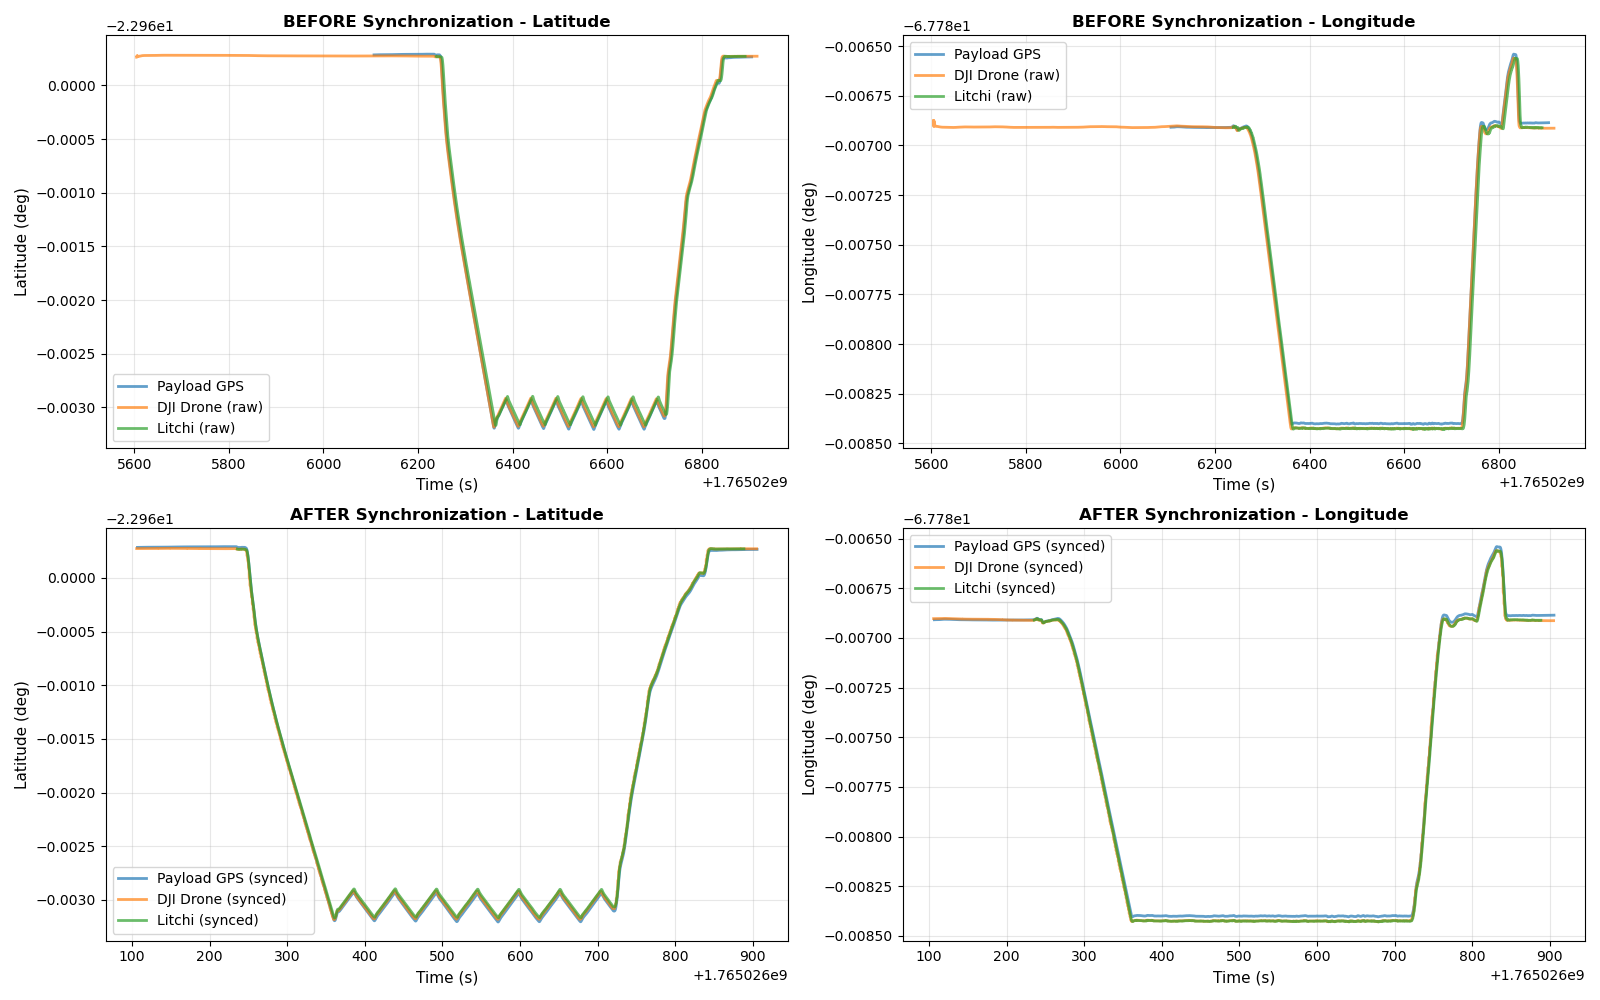

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# BEFORE SYNC - Latitude
axes[0, 0].plot(
    flight.raw_data.payload_data.gps["unix_time_ms"] / 1e3,
    flight.raw_data.payload_data.gps["posllh_lat"],
    label="Payload GPS",
    alpha=0.7,
    linewidth=2,
)
axes[0, 0].plot(
    flight.raw_data.drone_data.drone["correct_timestamp"],
    flight.raw_data.drone_data.drone["GPS:latitude"],
    label="DJI Drone (raw)",
    alpha=0.7,
    linewidth=2,
)
axes[0, 0].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"] / 1e3,
    flight.raw_data.drone_data.litchi["latitude"],
    label="Litchi (raw)",
    alpha=0.7,
    linewidth=2,
)
axes[0, 0].set_xlabel("Time (s)", fontsize=11)
axes[0, 0].set_ylabel("Latitude (deg)", fontsize=11)
axes[0, 0].set_title(
    "BEFORE Synchronization - Latitude", fontsize=12, fontweight="bold"
)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# BEFORE SYNC - Longitude
axes[0, 1].plot(
    flight.raw_data.payload_data.gps["unix_time_ms"] / 1e3,
    flight.raw_data.payload_data.gps["posllh_lon"],
    label="Payload GPS",
    alpha=0.7,
    linewidth=2,
)
axes[0, 1].plot(
    flight.raw_data.drone_data.drone["correct_timestamp"],
    flight.raw_data.drone_data.drone["GPS:longitude"],
    label="DJI Drone (raw)",
    alpha=0.7,
    linewidth=2,
)
axes[0, 1].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"] / 1e3,
    flight.raw_data.drone_data.litchi["longitude"],
    label="Litchi (raw)",
    alpha=0.7,
    linewidth=2,
)
axes[0, 1].set_xlabel("Time (s)", fontsize=11)
axes[0, 1].set_ylabel("Longitude (deg)", fontsize=11)
axes[0, 1].set_title(
    "BEFORE Synchronization - Longitude", fontsize=12, fontweight="bold"
)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# AFTER SYNC - Latitude
sync_data = flight.sync_data
axes[1, 0].plot(
    sync_data["reference_gps"]["timestamp"],
    sync_data["reference_gps"]["posllh_lat"],
    label="Payload GPS (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 0].plot(
    sync_data["drone"]["timestamp"],
    sync_data["drone"]["GPS:latitude"],
    label="DJI Drone (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 0].plot(
    sync_data["litchi"]["timestamp"],
    sync_data["litchi"]["latitude"],
    label="Litchi (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 0].set_xlabel("Time (s)", fontsize=11)
axes[1, 0].set_ylabel("Latitude (deg)", fontsize=11)
axes[1, 0].set_title("AFTER Synchronization - Latitude", fontsize=12, fontweight="bold")
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# AFTER SYNC - Longitude
axes[1, 1].plot(
    sync_data["reference_gps"]["timestamp"],
    sync_data["reference_gps"]["posllh_lon"],
    label="Payload GPS (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 1].plot(
    sync_data["drone"]["timestamp"],
    sync_data["drone"]["GPS:longitude"],
    label="DJI Drone (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 1].plot(
    sync_data["litchi"]["timestamp"],
    sync_data["litchi"]["longitude"],
    label="Litchi (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 1].set_xlabel("Time (s)", fontsize=11)
axes[1, 1].set_ylabel("Longitude (deg)", fontsize=11)
axes[1, 1].set_title(
    "AFTER Synchronization - Longitude", fontsize=12, fontweight="bold"
)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:
sync_data["reference_gps"]

unix_time_ms,posecef_ecefX,posecef_ecefY,posecef_ecefZ,posecef_msgmode,posecef_pAcc,datetime_relative,posllh_hAcc,posllh_hMSL,posllh_height,posllh_lat,posllh_lon,posllh_msgmode,posllh_vAcc,clock_clkB,clock_clkD,clock_fAcc,clock_msgmode,clock_tAcc,datetime,timestamp
i64,i64,i64,i64,i64,i64,datetime[μs],i64,i64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,datetime[ms],f64
1765026107000,222318175,-544418440,-247463249,0,314,2025-12-06 13:01:46.492,1632,5147644,5179.106,-22.959716,-67.786908,0,2688,-862436,246,389,0,6,2025-12-06 13:01:47,1.7650e9
1765026107500,222318178,-544418442,-247463250,0,310,2025-12-06 13:01:46.992,1610,5147673,5179.135,-22.959716,-67.786908,0,2652,-862311,251,378,0,5,2025-12-06 13:01:47.500,1.7650e9
1765026108000,222318178,-544418440,-247463248,0,306,2025-12-06 13:01:47.492,1590,5147648,5179.11,-22.959716,-67.786908,0,2618,-862186,249,356,0,5,2025-12-06 13:01:48,1.7650e9
1765026108500,222318178,-544418438,-247463245,0,302,2025-12-06 13:01:47.992,1569,5147626,5179.088,-22.959716,-67.786908,0,2584,-862063,245,355,0,5,2025-12-06 13:01:48.500,1.7650e9
1765026109000,222318179,-544418438,-247463244,0,299,2025-12-06 13:01:48.492,1549,5147621,5179.083,-22.959716,-67.786908,0,2553,-861941,244,351,0,5,2025-12-06 13:01:49,1.7650e9
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1765026903500,222318356,-544418266,-247463441,0,148,2025-12-06 13:15:02.992,783,5147540,5179.002,-22.959736,-67.786886,0,1258,-704084,198,343,0,3,2025-12-06 13:15:03.500,1.7650e9
1765026904000,222318356,-544418265,-247463440,0,148,2025-12-06 13:15:03.492,783,5147525,5178.987,-22.959736,-67.786886,0,1258,-703985,199,329,0,3,2025-12-06 13:15:04,1.7650e9
1765026904500,222318357,-544418265,-247463439,0,148,2025-12-06 13:15:03.992,783,5147525,5178.987,-22.959736,-67.786885,0,1258,-703885,199,334,0,3,2025-12-06 13:15:04.500,1.7650e9


## Inclinometer synchronization - pitch correlation

The inclinometer offset is estimated by cross-correlating its pitch angle against the Litchi gimbal pitch. The total correction applied to the inclinometer timestamps is the sum of the inclinometer-to-Litchi offset and the Litchi-to-GPS offset.

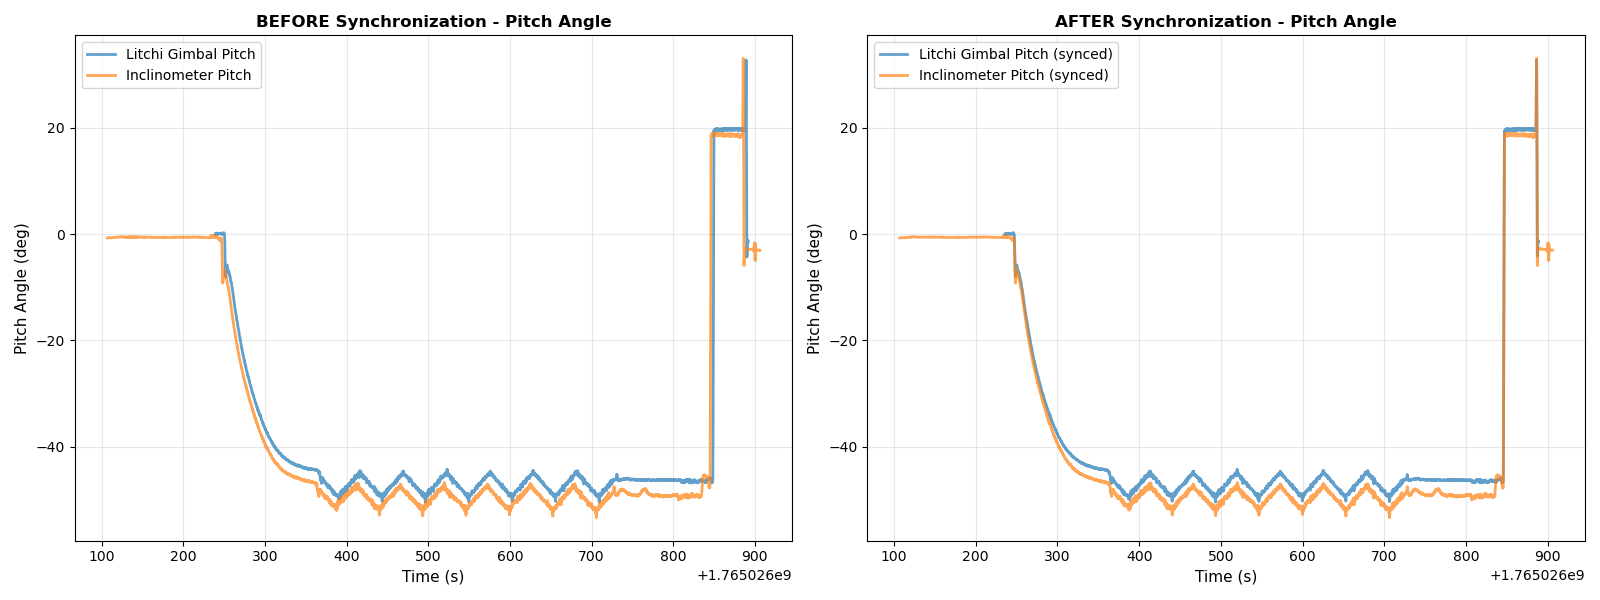

In [9]:
# Inclinometer Pitch Angle - Before and After Synchronization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE SYNC - Pitch Angle
axes[0].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"] / 1e3,
    flight.raw_data.drone_data.litchi["gimbalPitch"],
    label="Litchi Gimbal Pitch",
    alpha=0.7,
    linewidth=2,
)
axes[0].plot(
    flight.raw_data.payload_data["inclinometer"]["INS"]["timestamp"],
    flight.raw_data.payload_data["inclinometer"]["INS"]["pitch"],
    label="Inclinometer Pitch",
    alpha=0.7,
    linewidth=2,
)
axes[0].set_xlabel("Time (s)", fontsize=11)
axes[0].set_ylabel("Pitch Angle (deg)", fontsize=11)
axes[0].set_title(
    "BEFORE Synchronization - Pitch Angle", fontsize=12, fontweight="bold"
)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# AFTER SYNC - Pitch Angle
sync_data = flight.sync_data
axes[1].plot(
    sync_data["litchi"]["timestamp"],
    sync_data["litchi"]["gimbalPitch"],
    label="Litchi Gimbal Pitch (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1].plot(
    sync_data["inclinometer"]["timestamp"],
    sync_data["inclinometer"]["pitch"],
    label="Inclinometer Pitch (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1].set_xlabel("Time (s)", fontsize=11)
axes[1].set_ylabel("Pitch Angle (deg)", fontsize=11)
axes[1].set_title("AFTER Synchronization - Pitch Angle", fontsize=12, fontweight="bold")
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## GPS synchronization - RTK data

Re-running `sync()` with `use_rtk_data=True` replaces the standard GPS columns (`GPS:latitude`, `GPS:longitude`) with the higher-accuracy RTK columns (`RTK:lat_p`, `RTK:lon_p`). The synchronization algorithm is identical; only the drone GPS source changes. The plots show the same before/after comparison using RTK data.

In [10]:
flight.sync(use_rtk_data=True)

2026-02-18 10:20:10,161 - pils.synchronizer - INFO - Set GPS payload reference with 1598 samples
2026-02-18 10:20:10,161 - pils.synchronizer - INFO - Added drone GPS with 10629 samples
2026-02-18 10:20:10,166 - pils.synchronizer - INFO - Added litchi GPS with 5808 samples
2026-02-18 10:20:10,166 - pils.synchronizer - INFO - Added inclinometer with 114206 samples
2026-02-18 10:20:10,167 - pils.synchronizer - INFO - Added payload sensor 'adc' with 1277614 samples
2026-02-18 10:20:10,167 - pils.synchronizer - INFO - Detecting drone GPS offset via NED correlation...
2026-02-18 10:20:10,198 - pils.synchronizer - INFO - Drone GPS offset: 0.764s (corr=1.000)
2026-02-18 10:20:10,198 - pils.synchronizer - INFO - Detecting litchi GPS offset via NED correlation...
2026-02-18 10:20:10,217 - pils.synchronizer - INFO - Litchi GPS offset: -3.104s (corr=1.000)
2026-02-18 10:20:10,217 - pils.synchronizer - INFO - Detecting inclinometer offset via pitch correlation...
2026-02-18 10:20:10,220 - pils.sync

{'drone': shape: (7_986, 42)
 ┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
 │ correct_t ┆ tick     ┆ msg_type  ┆ GPS:date  ┆ … ┆ RTK:pos_f ┆ RTK:pos_f ┆ RTK:pos_f ┆ RTK:gps_s │
 │ imestamp  ┆ ---      ┆ ---       ┆ ---       ┆   ┆ lg_3      ┆ lg_4      ┆ lg_5      ┆ tate      │
 │ ---       ┆ f64      ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
 │ f64       ┆          ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
 ╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
 │ 1.7650e9  ┆ 2.2818e9 ┆ 35325.558 ┆ 2.0251206 ┆ … ┆ 50.0      ┆ 50.0      ┆ 0.0       ┆ 0.0       │
 │           ┆          ┆ 317       ┆ e7        ┆   ┆           ┆           ┆           ┆           │
 │ 1.7650e9  ┆ 2.2822e9 ┆ 7263.9742 ┆ 2.0251206 ┆ … ┆ 50.0      ┆ 50.0      ┆ 0.0       ┆ 0.0       │
 │           ┆          ┆ 57        ┆ e7        ┆   ┆

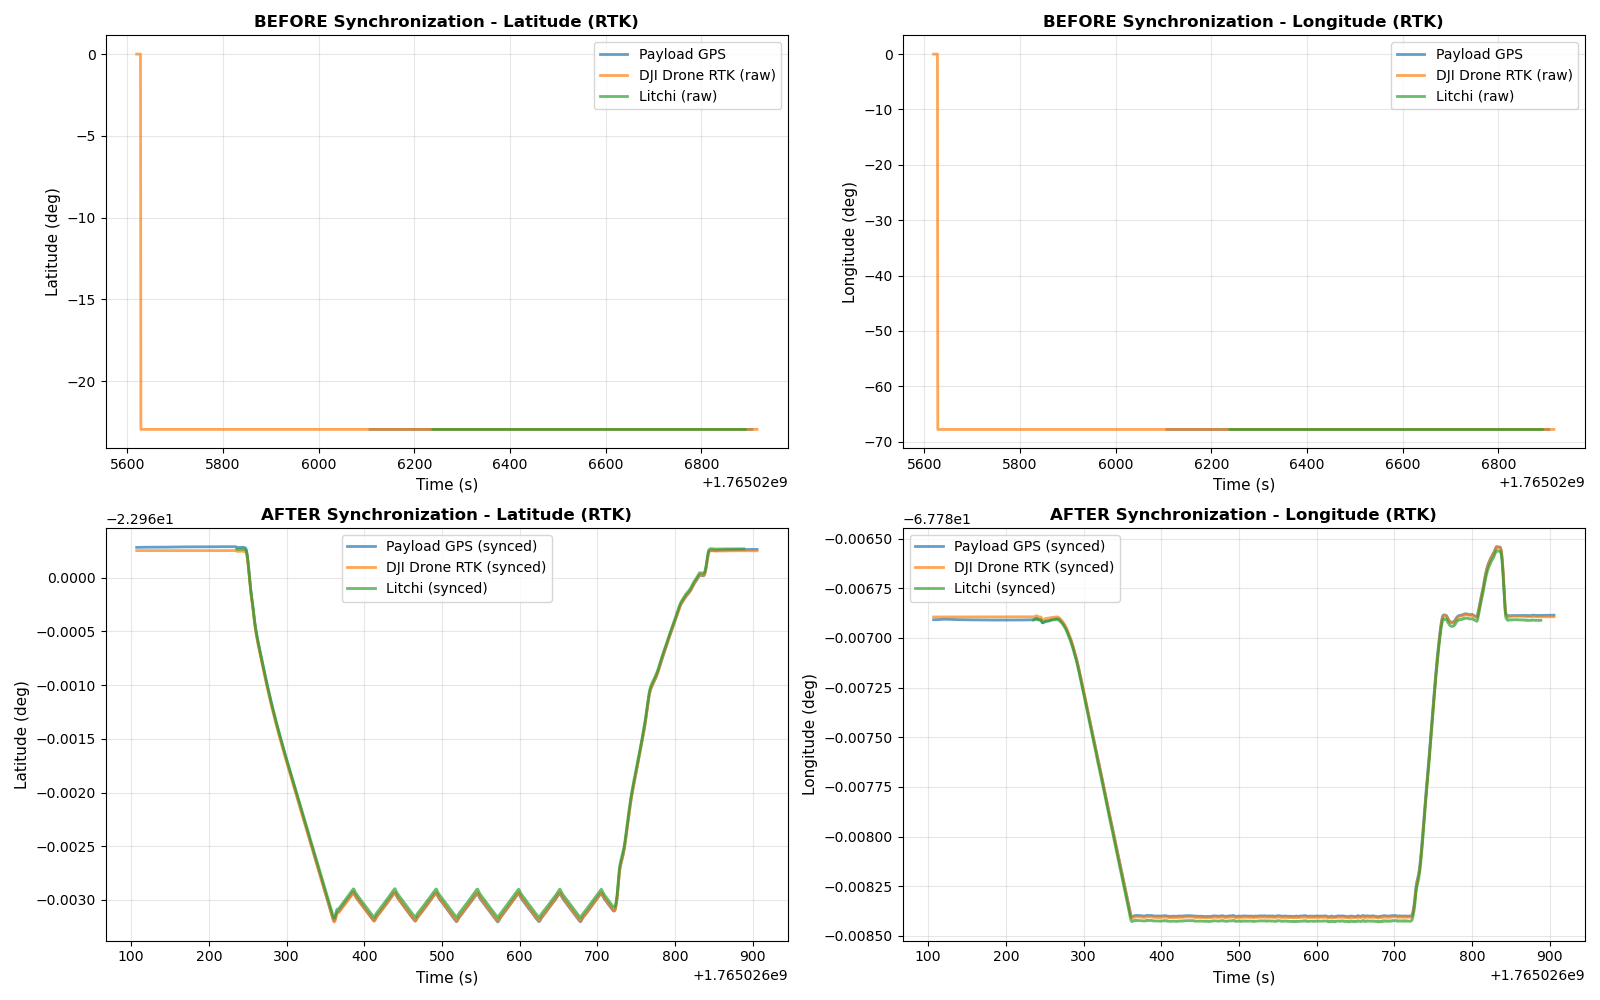

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# BEFORE SYNC - Latitude
axes[0, 0].plot(
    flight.raw_data.payload_data.gps["unix_time_ms"] / 1e3,
    flight.raw_data.payload_data.gps["posllh_lat"],
    label="Payload GPS",
    alpha=0.7,
    linewidth=2,
)
axes[0, 0].plot(
    flight.raw_data.drone_data.drone["correct_timestamp"],
    flight.raw_data.drone_data.drone["RTK:lat_p"],
    label="DJI Drone RTK (raw)",
    alpha=0.7,
    linewidth=2,
)
axes[0, 0].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"] / 1e3,
    flight.raw_data.drone_data.litchi["latitude"],
    label="Litchi (raw)",
    alpha=0.7,
    linewidth=2,
)
axes[0, 0].set_xlabel("Time (s)", fontsize=11)
axes[0, 0].set_ylabel("Latitude (deg)", fontsize=11)
axes[0, 0].set_title(
    "BEFORE Synchronization - Latitude (RTK)", fontsize=12, fontweight="bold"
)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# BEFORE SYNC - Longitude
axes[0, 1].plot(
    flight.raw_data.payload_data.gps["unix_time_ms"] / 1e3,
    flight.raw_data.payload_data.gps["posllh_lon"],
    label="Payload GPS",
    alpha=0.7,
    linewidth=2,
)
axes[0, 1].plot(
    flight.raw_data.drone_data.drone["correct_timestamp"],
    flight.raw_data.drone_data.drone["RTK:lon_p"],
    label="DJI Drone RTK (raw)",
    alpha=0.7,
    linewidth=2,
)
axes[0, 1].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"] / 1e3,
    flight.raw_data.drone_data.litchi["longitude"],
    label="Litchi (raw)",
    alpha=0.7,
    linewidth=2,
)
axes[0, 1].set_xlabel("Time (s)", fontsize=11)
axes[0, 1].set_ylabel("Longitude (deg)", fontsize=11)
axes[0, 1].set_title(
    "BEFORE Synchronization - Longitude (RTK)", fontsize=12, fontweight="bold"
)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# AFTER SYNC - Latitude
sync_data = flight.sync_data
axes[1, 0].plot(
    sync_data["reference_gps"]["timestamp"],
    sync_data["reference_gps"]["posllh_lat"],
    label="Payload GPS (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 0].plot(
    sync_data["drone"]["correct_timestamp"],
    sync_data["drone"]["RTK:lat_p"],
    label="DJI Drone RTK (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 0].plot(
    sync_data["litchi"]["timestamp"],
    sync_data["litchi"]["latitude"],
    label="Litchi (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 0].set_xlabel("Time (s)", fontsize=11)
axes[1, 0].set_ylabel("Latitude (deg)", fontsize=11)
axes[1, 0].set_title("AFTER Synchronization - Latitude (RTK)", fontsize=12, fontweight="bold")
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# AFTER SYNC - Longitude
axes[1, 1].plot(
    sync_data["reference_gps"]["timestamp"],
    sync_data["reference_gps"]["posllh_lon"],
    label="Payload GPS (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 1].plot(
    sync_data["drone"]["correct_timestamp"],
    sync_data["drone"]["RTK:lon_p"],
    label="DJI Drone RTK (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 1].plot(
    sync_data["litchi"]["timestamp"],
    sync_data["litchi"]["longitude"],
    label="Litchi (synced)",
    alpha=0.7,
    linewidth=2,
)
axes[1, 1].set_xlabel("Time (s)", fontsize=11)
axes[1, 1].set_ylabel("Longitude (deg)", fontsize=11)
axes[1, 1].set_title(
    "AFTER Synchronization - Longitude (RTK)", fontsize=12, fontweight="bold"
)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Synchronization with common_time=False

By default `sync()` resamples every source onto a uniform time axis at the specified `target_rate` (`common_time=True`). Setting `common_time=False` disables resampling: only the timestamps are shifted by the detected offset while the original samples and their spacing are kept intact.

This mode is useful when:
- Downstream processing requires the native sensor resolution.
- Interpolation artefacts need to be avoided.
- The data will be resampled externally at a later stage.

Note that with `common_time=False` each source retains its original number of rows, so the sources will generally have different lengths and cannot be directly concatenated into a single DataFrame.

In [12]:
flight.sync(use_rtk_data=True, common_time=False)
sync_data_no_interp = flight.sync_data

# Show row counts per source to confirm native resolution is preserved
for key, df in sync_data_no_interp.items():
    print(f"{key:30s}  {len(df):>6d} rows")

2026-02-18 10:20:10,734 - pils.synchronizer - INFO - Set GPS payload reference with 1598 samples
2026-02-18 10:20:10,734 - pils.synchronizer - INFO - Added drone GPS with 10629 samples
2026-02-18 10:20:10,739 - pils.synchronizer - INFO - Added litchi GPS with 5808 samples
2026-02-18 10:20:10,739 - pils.synchronizer - INFO - Added inclinometer with 114206 samples
2026-02-18 10:20:10,739 - pils.synchronizer - INFO - Added payload sensor 'adc' with 1277614 samples
2026-02-18 10:20:10,740 - pils.synchronizer - INFO - Detecting drone GPS offset via NED correlation...
2026-02-18 10:20:10,771 - pils.synchronizer - INFO - Drone GPS offset: 0.764s (corr=1.000)
2026-02-18 10:20:10,771 - pils.synchronizer - INFO - Detecting litchi GPS offset via NED correlation...
2026-02-18 10:20:10,791 - pils.synchronizer - INFO - Litchi GPS offset: -3.104s (corr=1.000)
2026-02-18 10:20:10,792 - pils.synchronizer - INFO - Detecting inclinometer offset via pitch correlation...
2026-02-18 10:20:10,795 - pils.sync

drone                            10629 rows
litchi                            5808 rows
inclinometer                    114206 rows
adc_timestamp                   1277614 rows
adc_amplitude                   1277614 rows
reference_gps                     1598 rows


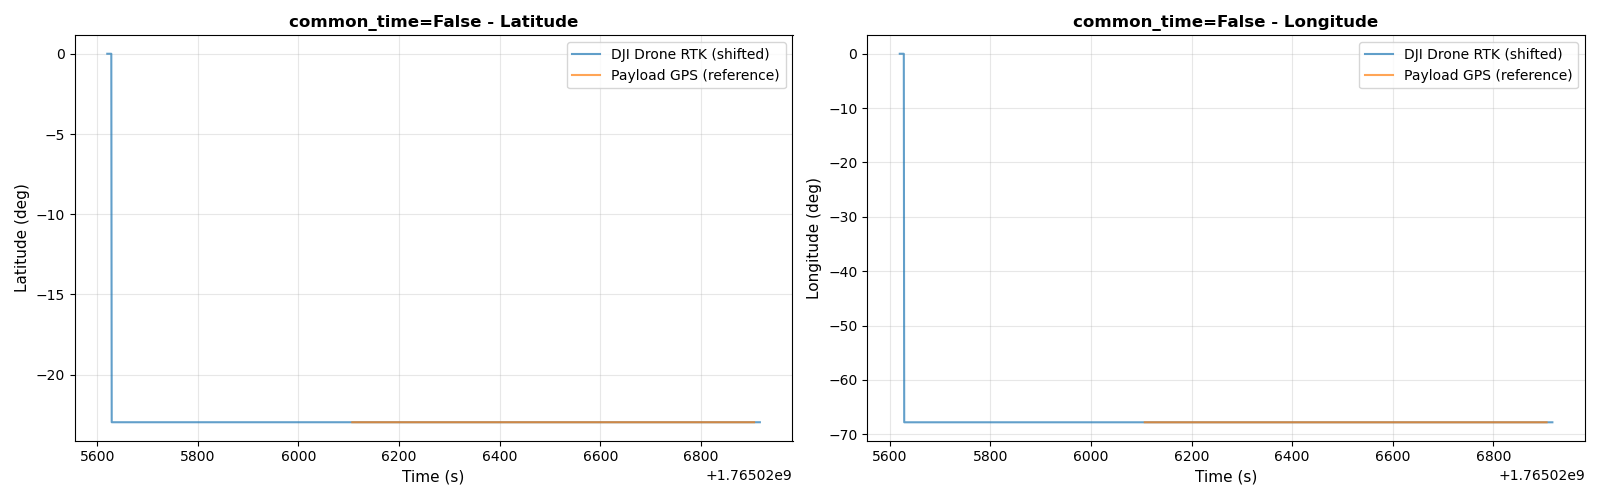

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Drone RTK latitude - shifted timestamps, original sample density
axes[0].plot(
    sync_data_no_interp["drone"]["correct_timestamp"],
    sync_data_no_interp["drone"]["RTK:lat_p"],
    label="DJI Drone RTK (shifted)",
    alpha=0.7,
    linewidth=1.5,
)
axes[0].plot(
    sync_data_no_interp["reference_gps"]["timestamp"],
    sync_data_no_interp["reference_gps"]["posllh_lat"],
    label="Payload GPS (reference)",
    alpha=0.7,
    linewidth=1.5,
)
axes[0].set_xlabel("Time (s)", fontsize=11)
axes[0].set_ylabel("Latitude (deg)", fontsize=11)
axes[0].set_title("common_time=False - Latitude", fontsize=12, fontweight="bold")
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Drone RTK longitude
axes[1].plot(
    sync_data_no_interp["drone"]["correct_timestamp"],
    sync_data_no_interp["drone"]["RTK:lon_p"],
    label="DJI Drone RTK (shifted)",
    alpha=0.7,
    linewidth=1.5,
)
axes[1].plot(
    sync_data_no_interp["reference_gps"]["timestamp"],
    sync_data_no_interp["reference_gps"]["posllh_lon"],
    label="Payload GPS (reference)",
    alpha=0.7,
    linewidth=1.5,
)
axes[1].set_xlabel("Time (s)", fontsize=11)
axes[1].set_ylabel("Longitude (deg)", fontsize=11)
axes[1].set_title("common_time=False - Longitude", fontsize=12, fontweight="bold")
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()